# Crawling the web with Beautiful Soup

In [1]:
%config Completer.use_jedi = False

In [3]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.varzesh3.com/football/league/900578/%D9%84%DB%8C%DA%AF-%D8%A8%D8%B1%D8%AA%D8%B1-%D8%A7%DB%8C%D8%B1%D8%A7%D9%86-1400-1401'

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table')
table 

<table class="league-standing football-standing" itemscope="" itemtype="https://schema.org/Table">
<caption itemprop="about">لیگ برتر ایران (خلیج فارس) 1400-1401</caption>
<thead>
<tr>
<th scope="col">#</th>
<th scope="col">تیم</th>
<th scope="col">بازی</th>
<th scope="col">برد</th>
<th scope="col">مساوی</th>
<th scope="col">باخت</th>
<th scope="col"> گل -/+</th>
<th scope="col">تفاضل </th>
<th scope="col">امتياز</th>
<th class="last-five" scope="col">5 بازی آخر  <img alt="direction" src="https://static.varzesh3.com/img/icons/last-five-arrow.svg" title="arrow"/> </th>
</tr>
</thead>
<tbody>
<tr>
<td>
<span class="standing-rule-color" style="background: #0f40d2"></span>1
                                
                            </td>
<td>
<a href="/football/team/4/استقلال">
<figure>
<img alt="استقلال" src="https://static.farakav.com/files/pictures/01150467.png?w=40" width="40"/>
</figure>
                                    استقلال 
                                </a>
</td>
<td>30</

💭 By inspecting the tag names in the webpage youre trying to crawl, give a short description of what each represent:

 - ```<thead>```: 
 - ```<tr>```:
 - ```<th>```:
 - ```<tbody>```:
 - ```<td>```:

<hr />

💭 Explain briefly what this code is doing. What should the missing value stand for?

....

In [4]:
rows = table.find_all('tr')
for row in rows:
    for head in row.find_all('th'):
        print([head.text])

['#']
['تیم']
['بازی']
['برد']
['مساوی']
['باخت']
[' گل -/+']
['تفاضل ']
['امتياز']
['5 بازی آخر   ']


In [5]:
for row in rows:        
    for body in row.find_all('td'):
        print([body.text])

['\n1\r\n                                \r\n                            ']
['\n\n\n\n\r\n                                    استقلال \r\n                                \n']
['30']
['19']
['11']
['0']
['39-10']
['29']
['68']
['\n\n✔\n\n\n✔\n\n\n ― \n\n\n✔\n\n\n ― \n\n']
['\n2\r\n                                \r\n                            ']
['\n\n\n\n\r\n                                    پرسپولیس \r\n                                \n']
['30']
['18']
['9']
['3']
['44-21']
['23']
['63']
['\n\n✔\n\n\n ― \n\n\n✖\n\n\n✔\n\n\n✔\n\n']
['\n3\r\n                                \r\n                            ']
['\n\n\n\n\r\n                                    سپاهان \r\n                                \n']
['30']
['16']
['8']
['6']
['43-21']
['22']
['56']
['\n\n✔\n\n\n✔\n\n\n✔\n\n\n✖\n\n\n ― \n\n']
['\n4\r\n                                \r\n                            ']
['\n\n\n\n\r\n                                    گل گهرسیرجان \r\n                                \n']
['30']
['1

In [7]:
rows = table.find_all('tr')

datas = []

for row in rows:
    data = []
    for head in row.find_all('th')[:10]:
        h = head.text
        
        ''' Enter your code here'''
        h = h.replace('\n', '').replace('\r', '').replace(' ', '')
        
        data.append(h)
    for body in row.find_all('td')[:10]:
        b = body.text
        
        ''' Enter your code here'''
        b = b.replace('\n', '').replace('\r', '').replace(' ', '')
        
        data.append(b)
    datas.append(data)

datas

[['#',
  'تیم',
  'بازی',
  'برد',
  'مساوی',
  'باخت',
  'گل-/+',
  'تفاضل',
  'امتياز',
  '5بازیآخر'],
 ['1', 'استقلال', '30', '19', '11', '0', '39-10', '29', '68', '✔✔―✔―'],
 ['2', 'پرسپولیس', '30', '18', '9', '3', '44-21', '23', '63', '✔―✖✔✔'],
 ['3', 'سپاهان', '30', '16', '8', '6', '43-21', '22', '56', '✔✔✔✖―'],
 ['4', 'گلگهرسیرجان', '30', '13', '12', '5', '37-28', '9', '51', '✔✔✔✔✔'],
 ['5', 'فولاد', '30', '13', '10', '7', '30-22', '8', '49', '✔✖✔✔―'],
 ['6', 'مسرفسنجان', '30', '12', '9', '9', '39-29', '10', '45', '✔✖✔✖―'],
 ['7', 'ذوبآهن', '30', '10', '7', '13', '21-25', '-4', '37', '――✔―✖'],
 ['8', 'آلومینیوماراک', '30', '7', '16', '7', '20-23', '-3', '37', '✖✔―――'],
 ['9', 'پیکان', '30', '7', '15', '8', '26-27', '-1', '36', '✖―✖――'],
 ['10', 'صنعتنفتآبادان', '30', '9', '9', '12', '26-30', '-4', '36', '―✖✖✖―'],
 ['11', 'هوادار', '30', '8', '10', '12', '18-25', '-7', '34', '✔✖✔✖✖'],
 ['12', 'نساجیمازندران', '30', '6', '15', '9', '24-34', '-10', '33', '―✖―✔―'],
 ['13', 'تراکتور',

<hr />

Converting ```datas``` to a pandas DataFrame with proper column names & no empty rows or columns and all numbers as integers. Also change "✔" to +1, "✖" to -1, and "-" to 0. For example, "✔✖✔✖―" should become \[1, -1, 1, -1, 0\]

In [8]:
import pandas as pd

''' Enter your code here'''
df = pd.DataFrame(datas[1:], columns=datas[0], index=[i for i in range(1,len(datas[1:])+1)])
df

,#,تیم,بازی,برد,مساوی,باخت,گل-/+,تفاضل,امتياز,5بازیآخر
1,1,استقلال,30,19,11,0,39-10,29,68,✔✔―✔―
2,2,پرسپولیس,30,18,9,3,44-21,23,63,✔―✖✔✔
3,3,سپاهان,30,16,8,6,43-21,22,56,✔✔✔✖―
4,4,گلگهرسیرجان,30,13,12,5,37-28,9,51,✔✔✔✔✔
5,5,فولاد,30,13,10,7,30-22,8,49,✔✖✔✔―
6,6,مسرفسنجان,30,12,9,9,39-29,10,45,✔✖✔✖―
7,7,ذوبآهن,30,10,7,13,21-25,-4,37,――✔―✖
8,8,آلومینیوماراک,30,7,16,7,20-23,-3,37,✖✔―――
9,9,پیکان,30,7,15,8,26-27,-1,36,✖―✖――
10,10,صنعتنفتآبادان,30,9,9,12,26-30,-4,36,―✖✖✖―


In [9]:
df.head()

,#,تیم,بازی,برد,مساوی,باخت,گل-/+,تفاضل,امتياز,5بازیآخر
1,1,استقلال,30,19,11,0,39-10,29,68,✔✔―✔―
2,2,پرسپولیس,30,18,9,3,44-21,23,63,✔―✖✔✔
3,3,سپاهان,30,16,8,6,43-21,22,56,✔✔✔✖―
4,4,گلگهرسیرجان,30,13,12,5,37-28,9,51,✔✔✔✔✔
5,5,فولاد,30,13,10,7,30-22,8,49,✔✖✔✔―


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 1 to 16
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   #         16 non-null     object
 1   تیم       16 non-null     object
 2   بازی      16 non-null     object
 3   برد       16 non-null     object
 4   مساوی     16 non-null     object
 5   باخت      16 non-null     object
 6   گل-/+     16 non-null     object
 7   تفاضل     16 non-null     object
 8   امتياز    16 non-null     object
 9   5بازیآخر  16 non-null     object
dtypes: object(10)
memory usage: 1.4+ KB


In [11]:
df[['G+', 'G-']] = df['گل-/+'].str.split('-', 1, expand=True)
df.head()

C:\Users\amirmahdi\AppData\Local\Temp\ipykernel_7700\38317016.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['G+', 'G-']] = df['گل-/+'].str.split('-', 1, expand=True)


,#,تیم,بازی,برد,مساوی,باخت,گل-/+,تفاضل,امتياز,5بازیآخر,G+,G-
1,1,استقلال,30,19,11,0,39-10,29,68,✔✔―✔―,39,10
2,2,پرسپولیس,30,18,9,3,44-21,23,63,✔―✖✔✔,44,21
3,3,سپاهان,30,16,8,6,43-21,22,56,✔✔✔✖―,43,21
4,4,گلگهرسیرجان,30,13,12,5,37-28,9,51,✔✔✔✔✔,37,28
5,5,فولاد,30,13,10,7,30-22,8,49,✔✖✔✔―,30,22


<hr />
teams with most loses

In [12]:
df.iloc[df['باخت'].astype('int').argmax(),:]

#                     15
تیم         شهرخودرومشهد
بازی                  30
برد                    2
مساوی                 11
باخت                  17
گل-/+              17-43
تفاضل                -26
امتياز                17
5بازیآخر           ✖―✖✖―
G+                    17
G-                    43
Name: 15, dtype: object

<hr />
team with most goal difference

In [14]:
df['تفاضل'] = df['G+'].astype('int') - df['G-'].astype('int')
df.iloc[df['تفاضل'].argmax(),:]

#                 1
تیم         استقلال
بازی             30
برد              19
مساوی            11
باخت              0
گل-/+         39-10
تفاضل            29
امتياز           68
5بازیآخر      ✔✔―✔―
G+               39
G-               10
Name: 1, dtype: object

<hr />
team which was the best during last 3 games

In [15]:
df['last3'] = df['5بازیآخر'].apply(lambda x: x[-3:].count('✔') * 3 + x[-3:].count('―') * 1)
df.iloc[df['last3'].argmax(),:]

#                     4
تیم         گلگهرسیرجان
بازی                 30
برد                  13
مساوی                12
باخت                  5
گل-/+             37-28
تفاضل                 9
امتياز               51
5بازیآخر          ✔✔✔✔✔
G+                   37
G-                   28
last3                 9
Name: 4, dtype: object

 <hr />
The code snippet below can be used to display Persian and Arabic strings beautifully when plotting in Python. 

- Please add the package ```arabic_reshaper``` by this command: ```!conda install -c conda-forge arabic_reshaper```
- Please add the package ```bidi``` by this command: ```!conda install -c conda-forge python-bidi```

In [21]:
# !pip install arabic_reshaper
# !pip install python-bidi

In [22]:
# The code 
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
def reshaper(text_list):
    for i in range(len(text_list)):
        text_list[i] = get_display(arabic_reshaper.reshape(u'%s' %str(text_list[i])))
    return text_list

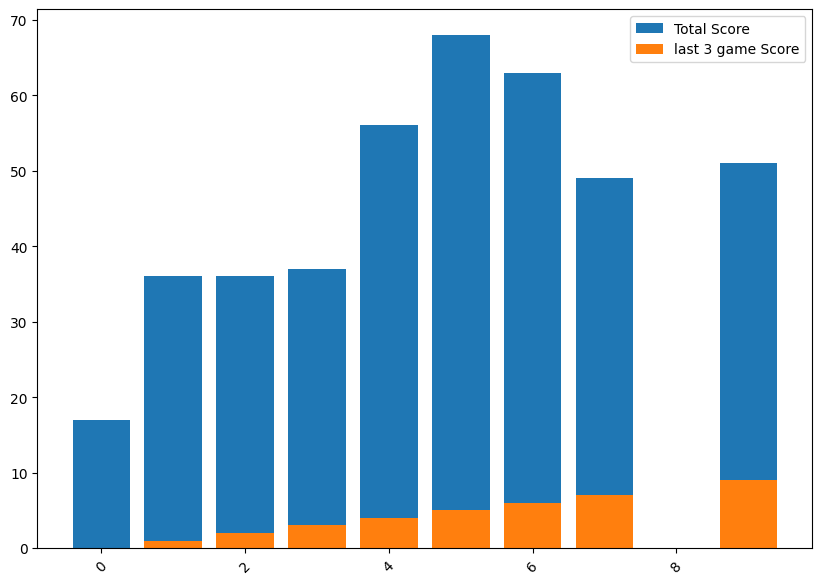

In [24]:
plt.figure(figsize=(10,7))
x_axis = reshaper(df['last3'].values)
plt.bar(x_axis, df['امتياز'].astype('int').values, label='Total Score')
plt.bar(x_axis, df['last3'].values, label='last 3 game Score')
plt.xticks(rotation=45)
plt.legend()
plt.show()